In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

MSPB_2024 =pd.read_csv("Medicare_Hospital_Spending_Per_Patient-Hospital2024.csv")
MSPB_2023 =pd.read_csv("Medicare_Hospital_Spending_Per_Patient-Hospital2023.csv")
MSPB_2022 =pd.read_csv("Medicare_Hospital_Spending_Per_Patient-Hospital2022.csv")
MSPB_2021 =pd.read_csv("Medicare_Hospital_Spending_Per_Patient-Hospital2021.csv")
MSPB_2020 =pd.read_csv("Medicare Hospital Spending Per Patient - Hospital2020.csv")
hospital_ids = [230017, 230020, 230038, 230058, 230081, 230097, 230110, 230156, 230222, 231320, 233300, 230059, 231322, 231322]

In [3]:
# List of DataFrames
mspb_dfs = [MSPB_2024, MSPB_2023, MSPB_2022, MSPB_2021, MSPB_2020]

# Columns to keep
columns_to_keep = ['Facility ID', 'Facility Name', 'Measure ID', 'Measure Name', 'Score', 'End Date']

# Clean and filter each DataFrame
def clean_filter(df):
    df = df[pd.to_numeric(df['Facility ID'], errors='coerce').notna()]
    df['Facility ID'] = df['Facility ID'].astype(int)
    df = df[df['Facility ID'].isin(hospital_ids)]
    return df[columns_to_keep]

# Merge cleaned datasets
merged_MSPB_1 = pd.concat([clean_filter(df) for df in mspb_dfs], ignore_index=True)

# Convert 'Score' to numeric (handle any non-numeric gracefully)
merged_MSPB_1['Score'] = pd.to_numeric(merged_MSPB_1['Score'], errors='coerce')

# Extract Year from 'End Date' and create a new column
merged_MSPB_1['Year'] = pd.to_datetime(merged_MSPB_1['End Date'], errors='coerce').dt.year

# Final output
merged_MSPB_1.head(5)

,Facility ID,Facility Name,Measure ID,Measure Name,Score,End Date,Year
0,230017,BRONSON METHODIST HOSPITAL,MSPB-1,Medicare hospital spending per patient (Medica...,0.92,12/31/2022,2022
1,230020,BEAUMONT HOSPITAL - DEARBORN,MSPB-1,Medicare hospital spending per patient (Medica...,1.04,12/31/2022,2022
2,230038,SPECTRUM HEALTH,MSPB-1,Medicare hospital spending per patient (Medica...,0.95,12/31/2022,2022
3,230058,MUNSON HEALTHCARE GRAYLING HOSPITAL,MSPB-1,Medicare hospital spending per patient (Medica...,0.88,12/31/2022,2022
4,230059,MERCY HEALTH SAINT MARY'S,MSPB-1,Medicare hospital spending per patient (Medica...,0.94,12/31/2022,2022


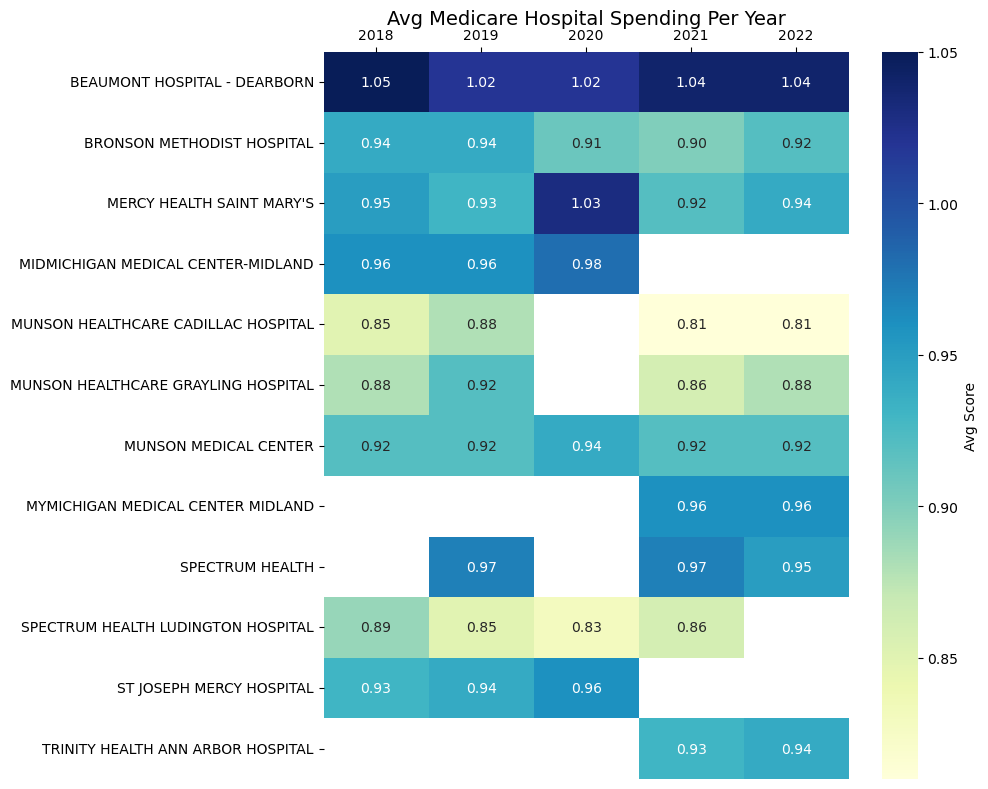

In [4]:
#Heatmap of the avg score per year per facility
avg_score = merged_MSPB_1.groupby(['Facility Name', 'Year'])['Score'].mean().reset_index()
# Pivot and filter
pivot = avg_score.pivot(index='Facility Name', columns='Year', values='Score')
pivot = pivot[pivot.isna().sum(axis=1) < 4]  # Keep hospitals with atleast spending history of two years.

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Avg Score'},
    xticklabels=True,
    yticklabels=True
)

# Customize
plt.title("Avg Medicare Hospital Spending Per Year", fontsize=14, pad=20)
plt.xlabel("")  # Remove x-axis label
plt.ylabel("")  # Remove y-axis label
plt.xticks(rotation=45)
plt.gca().xaxis.tick_top()  # Move x-axis to top
plt.tight_layout()
plt.savefig("hospital_spending_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()